### Use yt clumpfind on snapshot 28

#### Note we have yet to tell yt what the "columns" in ramses output are.. esp. we need to read in f_H2. 

In [8]:
import yt

ds = yt.load("output/output_00028/info_00028.txt")

yt : [INFO     ] 2018-07-03 13:34:05,834 Parameters: current_time              = 3.17276944493
yt : [INFO     ] 2018-07-03 13:34:05,835 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-03 13:34:05,837 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-07-03 13:34:05,838 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-07-03 13:34:05,839 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-03 13:34:05,839 Parameters: current_redshift          = 5.99989573953
yt : [INFO     ] 2018-07-03 13:34:05,840 Parameters: omega_lambda              = 0.691999971867
yt : [INFO     ] 2018-07-03 13:34:05,840 Parameters: omega_matter              = 0.307999998331
yt : [INFO     ] 2018-07-03 13:34:05,841 Parameters: hubble_constant           = 0.677900009155


In [9]:
ds.density_unit

9.12671643381e-28 g/cm**3

In [10]:
Hmass_cgs = 1.673534E-24  # gram

In [11]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'mesh_id'),
 ('all', 'particle_age'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_identifier'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 

In [5]:
!cat output/output_00028/*csv

In [12]:
%matplotlib inline

In [13]:
import matplotlib
matplotlib.use('Agg')

slc = yt.SlicePlot(ds, 'z', 'density')
slc.show();

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/admin/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/admin/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 403, i

In [8]:
slc.save()

# [dataset name]_[plot type]_[axis]_[field name].[suffix]

yt : [INFO     ] 2018-07-03 13:16:38,210 Saving plot info_00028_Slice_z_density.png


['info_00028_Slice_z_density.png']

In [14]:
slc.save?

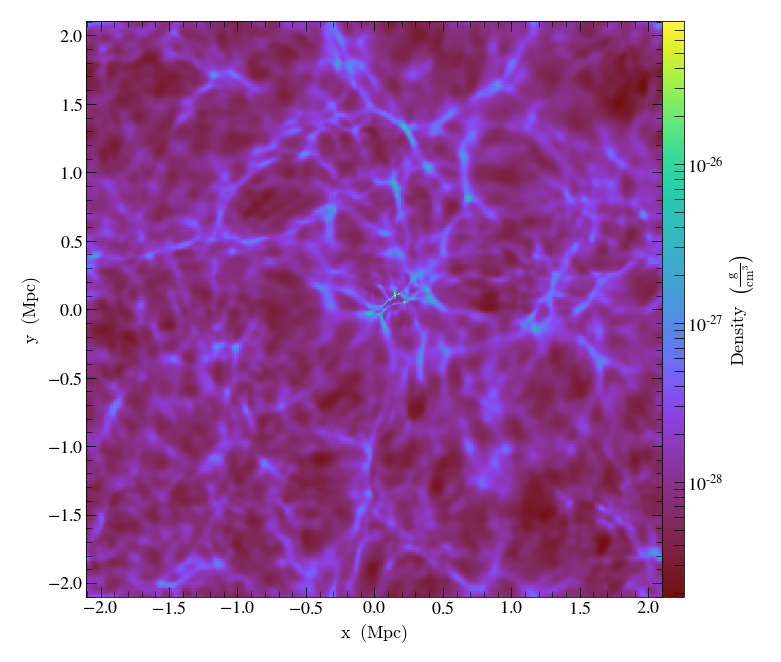

In [15]:
from IPython.display import Image
Image('info_00028_Slice_z_density.png')

In [16]:
print (ds.domain_width.in_units("Mpc"))

[ 4.20700432  4.20700432  4.20700432] Mpc


### Q: is yt showing the full box? 

In [17]:
from yt.units import kpc

center = [0.53103, 0.51031000000000004, 0.50402000000000002]

distance = 0.00075
far_cut_depth = 0.00075
region_size = 0.0015

slc = yt.SlicePlot(ds, 'z', 'density', center=center, width=(2*region_size))

yt : [INFO     ] 2018-07-03 13:35:37,133 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-03 13:35:37,134 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-03 13:35:37,137 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-03 13:35:37,140 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-03 13:35:37,147 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [18]:
slc.save('info_00028_Slice_z_density_regsize0.0015.png')

yt : [INFO     ] 2018-07-03 13:35:38,465 Saving plot info_00028_Slice_z_density_regsize0.0015.png


['info_00028_Slice_z_density_regsize0.0015.png']

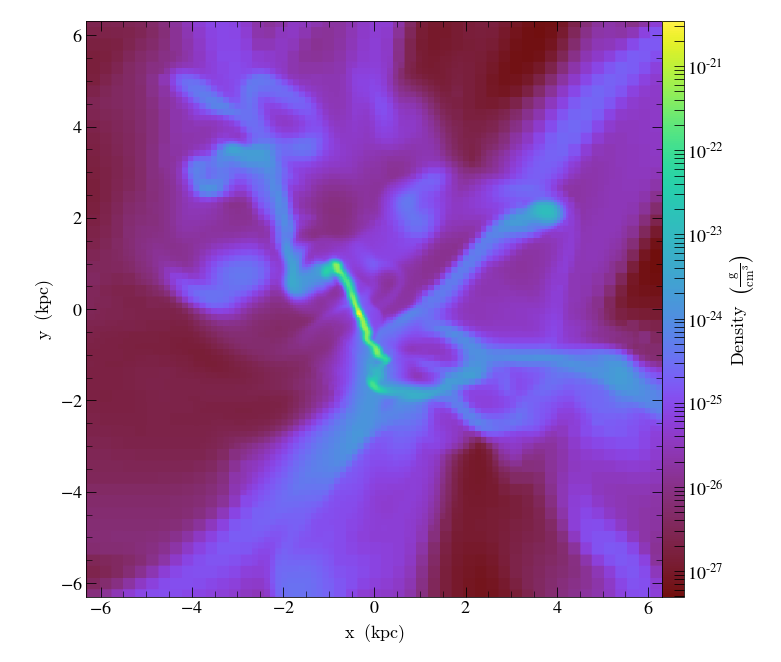

In [19]:
Image('info_00028_Slice_z_density_regsize0.0015.png')

### Q: why does this look so different from the density plot we looked at w/ pymses? Not because of the angle, since I also plotted that by viewing down from z-axis in read_00028.ipynb.

In [20]:
yt.SlicePlot?

### take a different up_vector (as defined in the .csv), off-axis projection

In [21]:
up_vector = [0.10255487134299716, 0.059509123032244614, 0.99294569974382518]

cut = yt.SlicePlot(ds, fields='Density', normal=up_vector, center=center, width=(2*region_size))
cut.save('info_00028_Slice_up_density_regsize0.0015.png')

yt : [INFO     ] 2018-07-03 13:36:01,133 xlim = -0.001500 0.001500
yt : [INFO     ] 2018-07-03 13:36:01,134 ylim = -0.001500 0.001500
yt : [INFO     ] 2018-07-03 13:36:01,135 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800
yt : [INFO     ] 2018-07-03 13:36:03,890 Saving plot info_00028_Slice_up_density_regsize0.0015.png


['info_00028_Slice_up_density_regsize0.0015.png']

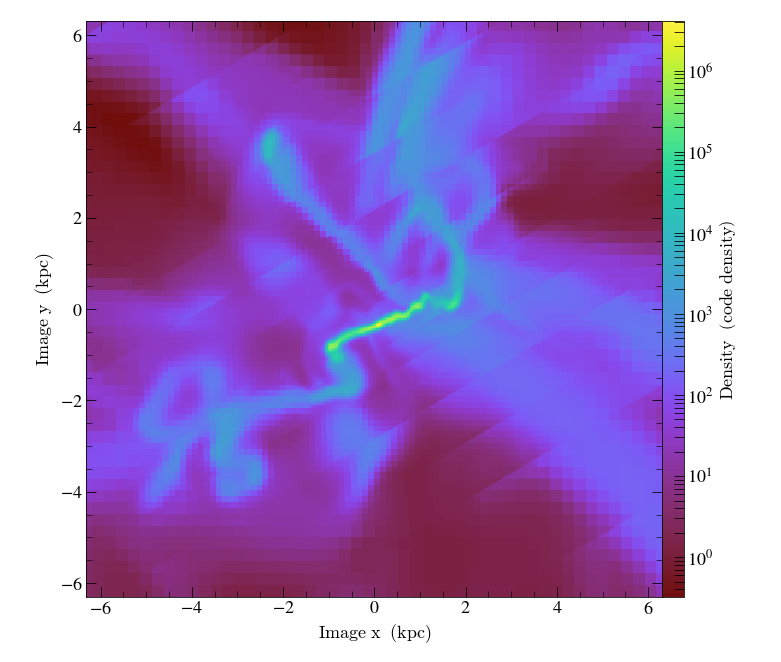

In [22]:
Image('info_00028_Slice_up_density_regsize0.0015.png')

In [23]:
cut.annotate_contour("Density")
# cut.save("info_00028_Slice_up_density_regsize0.0015_contour.png")

YTPlotCallbackError: annotate_contour callback failed with the following error: In initialize: Triangulation is invalid

### Off_axis_projection

In [ ]:
yt.off_axis_projection?
# ds, center, normal_vector, width, resolution, field

In [24]:
N = 256
image = yt.off_axis_projection(ds, center, up_vector, [region_size, region_size, region_size], N, "Density")

In [25]:
import numpy as np

yt.write_image(np.log10(image), "%s_offaxis_projection.png" % ds)

array([[[129,  41,  97, 255],
        [129,  41,  97, 255],
        [129,  41,  97, 255],
        ..., 
        [137,  70, 230, 255],
        [134,  74, 235, 255],
        [134,  75, 236, 255]],

       [[129,  41,  97, 255],
        [129,  41,  97, 255],
        [129,  41,  97, 255],
        ..., 
        [137,  69, 228, 255],
        [135,  72, 233, 255],
        [135,  73, 233, 255]],

       [[129,  41,  98, 255],
        [129,  41,  98, 255],
        [129,  41,  98, 255],
        ..., 
        [137,  70, 229, 255],
        [135,  73, 233, 255],
        [135,  73, 233, 255]],

       ..., 
       [[133,  45, 116, 255],
        [132,  45, 115, 255],
        [132,  45, 116, 255],
        ..., 
        [128,  39,  90, 255],
        [128,  39,  91, 255],
        [128,  40,  92, 255]],

       [[133,  45, 117, 255],
        [132,  45, 115, 255],
        [133,  45, 116, 255],
        ..., 
        [128,  39,  91, 255],
        [128,  40,  91, 255],
        [128,  40,  92, 255]],

       

In [26]:
!ls -lrt *.png

-rw-r--r--@ 1 admin  staff  121762 Jul  3 10:36 info_00028_Slice_z_density_regsize0.0015_nativeSimOrigin.png
-rw-r--r--@ 1 admin  staff  270377 Jul  3 13:16 info_00028_Slice_z_density.png
-rw-r--r--  1 admin  staff   76293 Jul  3 13:35 info_00028_Slice_z_density_regsize0.0015.png
-rw-r--r--@ 1 admin  staff   75560 Jul  3 13:36 info_00028_Slice_up_density_regsize0.0015.png
-rw-r--r--@ 1 admin  staff   75942 Jul  4 16:06 info_00028_offaxis_projection.png


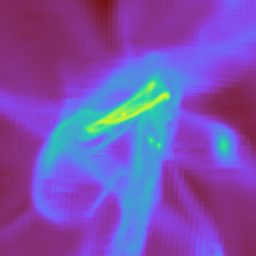

In [27]:
Image('info_00028_offaxis_projection.png')

### Q: still trying to understand why does it look so different from pymses..

In [28]:
# # this block takes forever to run, and may crash, skip...
# prj = yt.OffAxisProjectionPlot(ds, up_vector, 'Density',width=(2*region_size))
# prj.save('info_00028_offaxis_projection_annotated')
# Image('info_00028_offaxis_projection_annotated.png')

### Shift origin in SlicePlot()

By default, SlicePlot shifts the coordinates on the axes such that the origin is at the center of the slice. To instead use the coordinates as defined in the dataset, use the optional argument: origin="native". 

In our case, origin of the sim. is also at the center of the slice. 

yt : [INFO     ] 2018-07-04 16:06:20,745 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-04 16:06:20,749 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-04 16:06:20,753 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-04 16:06:20,754 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-04 16:06:20,764 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-07-04 16:06:46,632 Saving plot info_00028_Slice_z_density_regsize0.0015_nativeSimOrigin.png


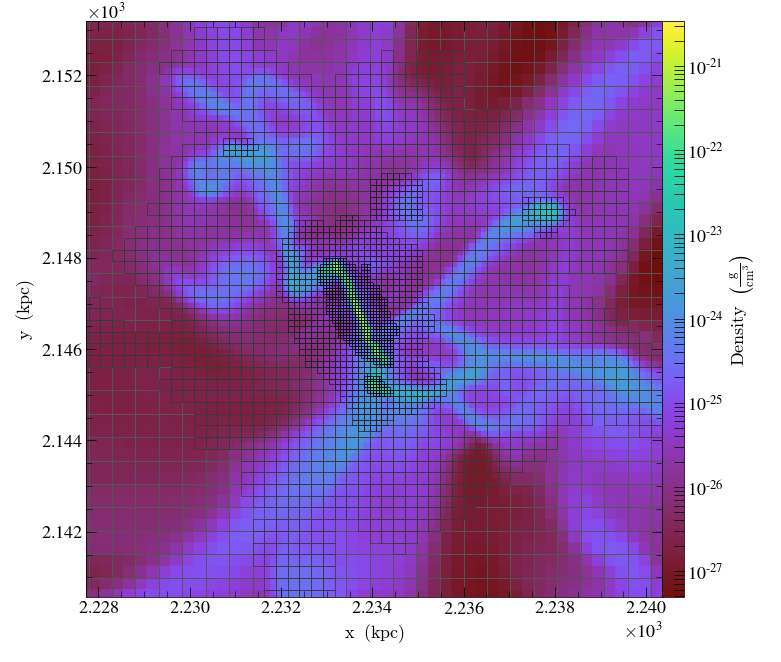

In [29]:
slc = yt.SlicePlot(ds, 'z', 'density', center=center, width=(2*region_size), origin="native")  
slc.annotate_grids()
slc.save('info_00028_Slice_z_density_regsize0.0015_nativeSimOrigin.png')
Image('info_00028_Slice_z_density_regsize0.0015_nativeSimOrigin.png')

In [30]:
ds.field_list

[('all', 'particle_age'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('io', 'particle_age'),
 ('io', 'particle_identifier'),
 ('io', 'particle_mass'),
 ('io', 'particle_metallicity'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('ramses', 'Density'),
 ('ramses', 'Metallicity'),
 ('ramses', 'Pressure'),
 ('ramses', 'var12'),
 ('ramses', 'var13'),
 ('ramses', 'var14'),
 ('ramses', 'var15'),
 ('ramses', 'var16'),
 ('ramses', 'x-Bfield-left'),
 ('ramses', 'x-Bfield-right'),
 ('ramses', 'x-velocity'),
 ('ramses', 'y-Bfield-

In [31]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'mesh_id'),
 ('all', 'particle_age'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_identifier'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 

In [32]:
print(ds.field_info["ramses", "Density"].get_source())

def NullFunc(field, data):
    raise YTFieldNotFound(field.name)



In [33]:
ds.field_info["ramses", "Density"]

On-Disk Field (ramses, Density): (units: code_density)

yt : [INFO     ] 2018-07-04 16:06:54,927 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-04 16:06:54,928 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-04 16:06:54,931 xlim = 0.529530 0.532530
yt : [INFO     ] 2018-07-04 16:06:54,932 ylim = 0.508810 0.511810
yt : [INFO     ] 2018-07-04 16:06:54,936 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800
yt : [INFO     ] 2018-07-04 16:06:55,748 Saving plot info_00028_Slice_z_Density_regsize0.0015.png


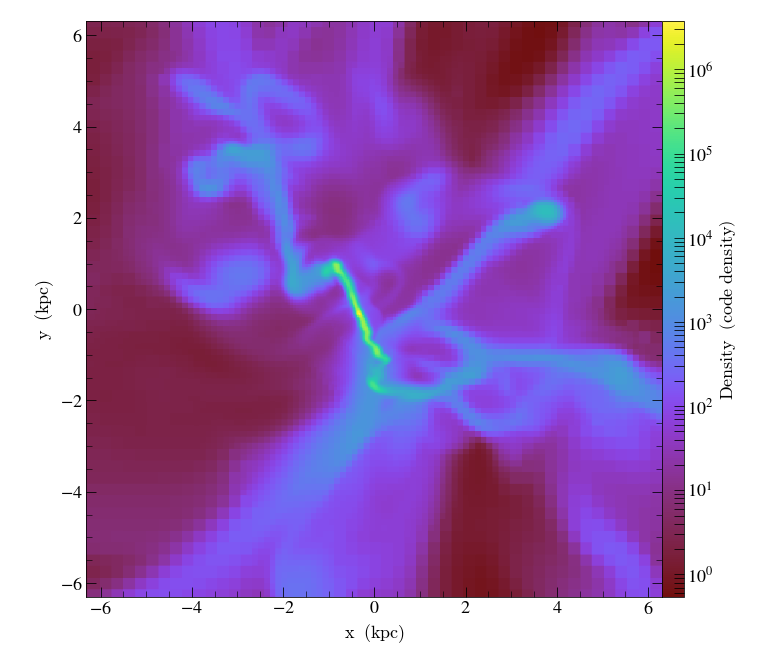

In [34]:
slc = yt.SlicePlot(ds, 'z', 'Density', center=center, width=(2*region_size))
# slc.annotate_grids()
slc.save('info_00028_Slice_z_Density_regsize0.0015.png')
Image('info_00028_Slice_z_Density_regsize0.0015.png')

# properly load in all the fields..

In [36]:
_ds = yt.load("output/output_00028/info_00028.txt", \
          fields = ["Density","x-velocity", "y-velocity", "z-velocity", "Pressure_nt", \
                    "Pressure", "Z", "H", "E", "H+", "HE", "HE+", "HE++", "H-", "H2", "H2"])

yt : [INFO     ] 2018-07-04 17:13:43,690 Parameters: current_time              = 3.17276944493
yt : [INFO     ] 2018-07-04 17:13:43,691 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-04 17:13:43,692 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-07-04 17:13:43,693 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-07-04 17:13:43,695 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-04 17:13:43,696 Parameters: current_redshift          = 5.99989573953
yt : [INFO     ] 2018-07-04 17:13:43,696 Parameters: omega_lambda              = 0.691999971867
yt : [INFO     ] 2018-07-04 17:13:43,697 Parameters: omega_matter              = 0.307999998331
yt : [INFO     ] 2018-07-04 17:13:43,698 Parameters: hubble_constant           = 0.677900009155


In [37]:
ds.field_list

[('all', 'particle_age'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('io', 'particle_age'),
 ('io', 'particle_identifier'),
 ('io', 'particle_mass'),
 ('io', 'particle_metallicity'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('ramses', 'Density'),
 ('ramses', 'Metallicity'),
 ('ramses', 'Pressure'),
 ('ramses', 'var12'),
 ('ramses', 'var13'),
 ('ramses', 'var14'),
 ('ramses', 'var15'),
 ('ramses', 'var16'),
 ('ramses', 'x-Bfield-left'),
 ('ramses', 'x-Bfield-right'),
 ('ramses', 'x-velocity'),
 ('ramses', 'y-Bfield-

In [38]:
_ds.field_list

[('all', 'particle_age'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('io', 'particle_age'),
 ('io', 'particle_identifier'),
 ('io', 'particle_mass'),
 ('io', 'particle_metallicity'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('ramses', 'Density'),
 ('ramses', 'E'),
 ('ramses', 'H'),
 ('ramses', 'H+'),
 ('ramses', 'H-'),
 ('ramses', 'H2'),
 ('ramses', 'H2'),
 ('ramses', 'HE'),
 ('ramses', 'HE+'),
 ('ramses', 'HE++'),
 ('ramses', 'Pressure'),
 ('ramses', 'Pressure_nt'),
 ('ramses', 'Z'),
 ('ramses', 'x-velocity'),
 ('

In [39]:
slc = yt.SlicePlot(_ds, 'z', 'density')
slc.show();

yt : [INFO     ] 2018-07-04 17:17:21,198 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-07-04 17:17:21,204 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-07-04 17:17:21,209 xlim = 0.000000 1.000000
yt : [INFO     ] 2018-07-04 17:17:21,210 ylim = 0.000000 1.000000
yt : [INFO     ] 2018-07-04 17:17:21,213 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [40]:
slc.save('_ds_z_density.png')

yt : [INFO     ] 2018-07-04 17:18:12,879 Saving plot _ds_z_density.png


['_ds_z_density.png']

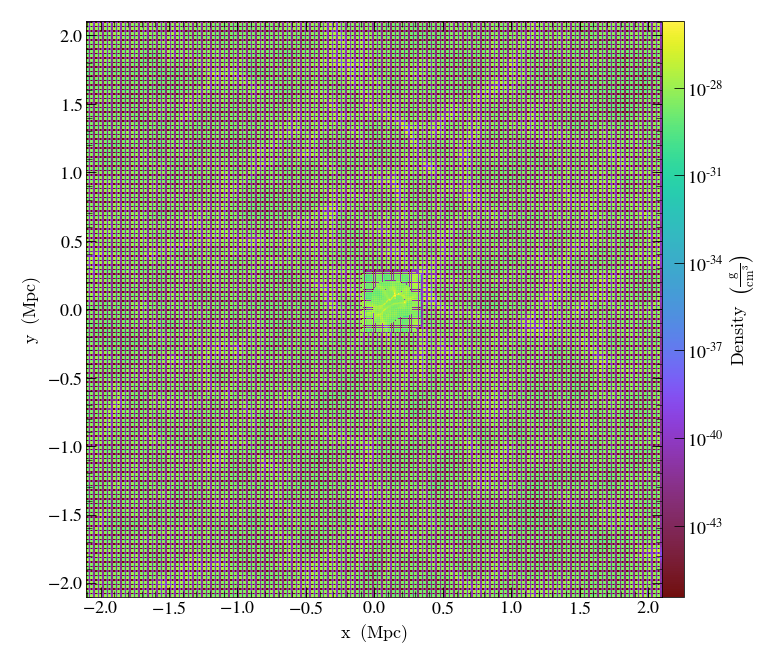

In [41]:
Image('_ds_z_density.png')